<a href="https://colab.research.google.com/github/SaraMuayad/Electropi_AI_Projects/blob/main/Market_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix

Upload dataset

In [8]:
df = pd.read_csv('sample_data/bank-additional-full.csv')
df.head()

,"age;""job"";""marital"";""education"";""default"";""housing"";""loan"";""contact"";""month"";""day_of_week"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""emp.var.rate"";""cons.price.idx"";""cons.conf.idx"";""euribor3m"";""nr.employed"";""y"""
0,"56;""housemaid"";""married"";""basic.4y"";""no"";""no"";..."
1,"57;""services"";""married"";""high.school"";""unknown..."
2,"37;""services"";""married"";""high.school"";""no"";""ye..."
3,"40;""admin."";""married"";""basic.6y"";""no"";""no"";""no..."
4,"56;""services"";""married"";""high.school"";""no"";""no..."


Display full of Bank Additional

In [9]:
df = pd.read_csv("sample_data/bank-additional-full.csv", delimiter=";")
column_names = [
    "age", "job", "marital", "education", "default",
    "housing", "loan", "contact", "month", "day_of_week",
    "duration", "campaign", "pdays", "previous", "poutcome",
    "emp.var.rate", "cons.price.idx", "cons.conf.idx",
    "euribor3m", "nr.employed", "y"
]
df.columns = column_names
print(df)

       age          job  marital            education  default housing loan  \
0       56    housemaid  married             basic.4y       no      no   no   
1       57     services  married          high.school  unknown      no   no   
2       37     services  married          high.school       no     yes   no   
3       40       admin.  married             basic.6y       no      no   no   
4       56     services  married          high.school       no      no  yes   
...    ...          ...      ...                  ...      ...     ...  ...   
41183   73      retired  married  professional.course       no     yes   no   
41184   46  blue-collar  married  professional.course       no      no   no   
41185   56      retired  married    university.degree       no     yes   no   
41186   44   technician  married  professional.course       no      no   no   
41187   74      retired  married  professional.course       no     yes   no   

         contact month day_of_week  ...  campaign  

In [10]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [11]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [ ]:
df.duplicated().sum()

12

In [ ]:

df.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=False)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [12]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [13]:
df['education'].fillna(df['education'].mode()[0], inplace=True)

df['poutcome'].fillna('unknown', inplace=True)

df.isnull().sum()


age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

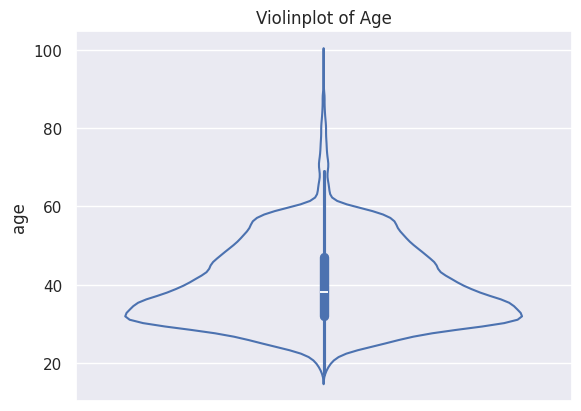

In [14]:
sns.set(style="darkgrid")
sns.violinplot(y=df['age'],fill=False)
plt.title('Violinplot of Age')
plt.show()

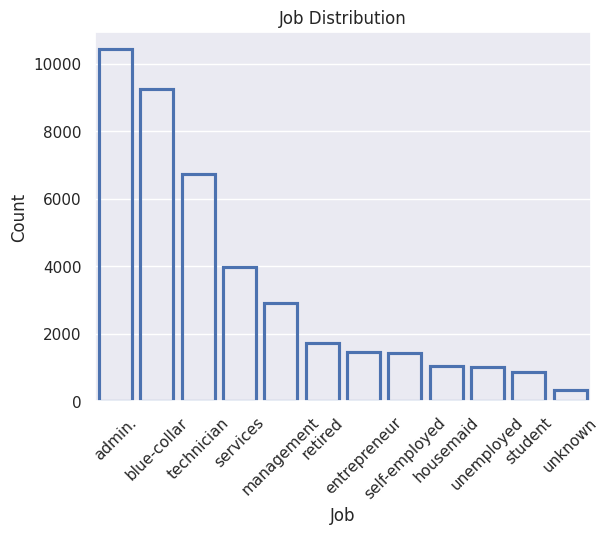

In [15]:
sns.set(style="darkgrid")
sns.countplot(data=df, x='job', order=df['job'].value_counts().index,fill=False)
plt.xlabel('Job')
plt.ylabel('Count')
plt.title('Job Distribution')
plt.xticks(rotation=45)
plt.show()

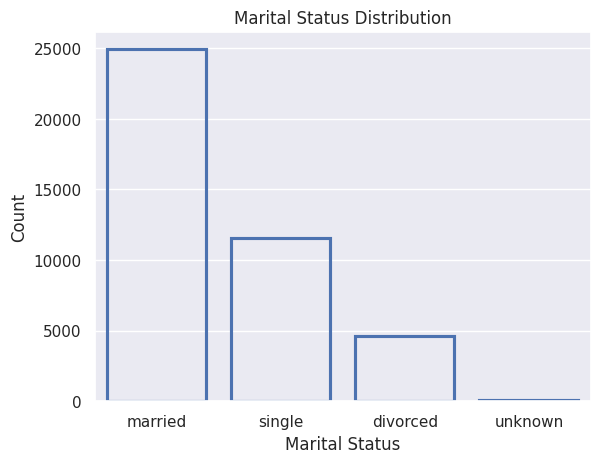

In [16]:
sns.set(style="darkgrid")
sns.countplot(data=df, x='marital', order=df['marital'].value_counts().index,fill=False)
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.title('Marital Status Distribution')
plt.show()

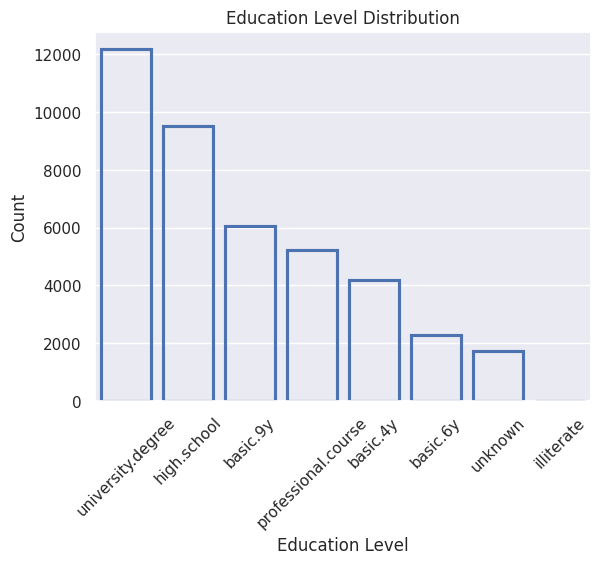

In [17]:
sns.set(style="darkgrid")
sns.countplot(data=df, x='education', order=df['education'].value_counts().index, fill=False)
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('Education Level Distribution')
plt.xticks(rotation=45)
plt.show()


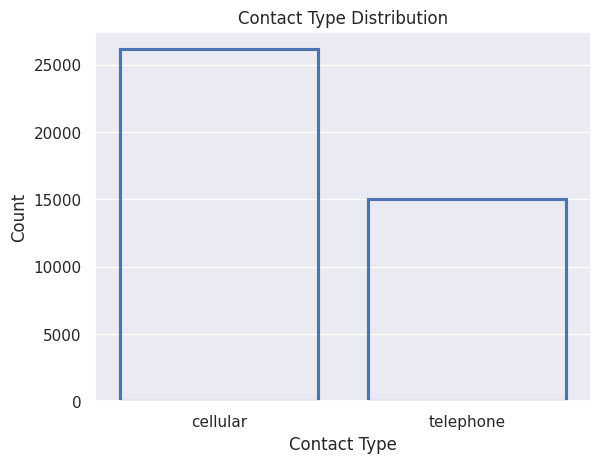

In [18]:
sns.set(style="darkgrid")
sns.countplot(data=df, x='contact', order=df['contact'].value_counts().index, fill=False)
plt.xlabel('Contact Type')
plt.ylabel('Count')
plt.title('Contact Type Distribution')
plt.show()


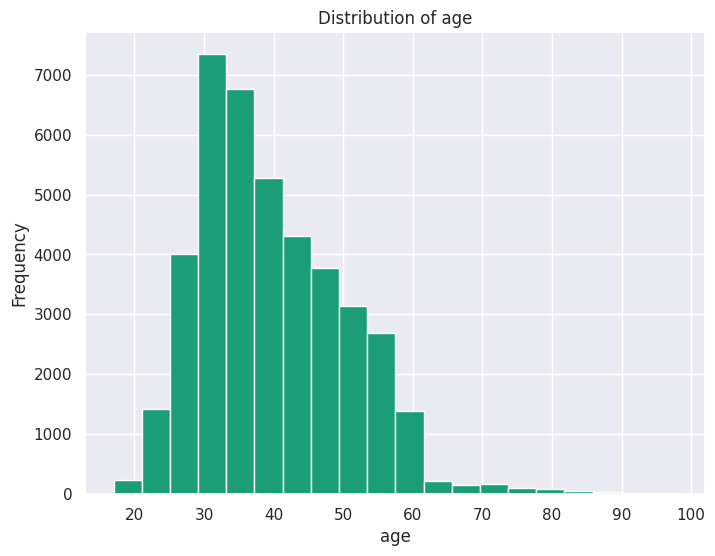

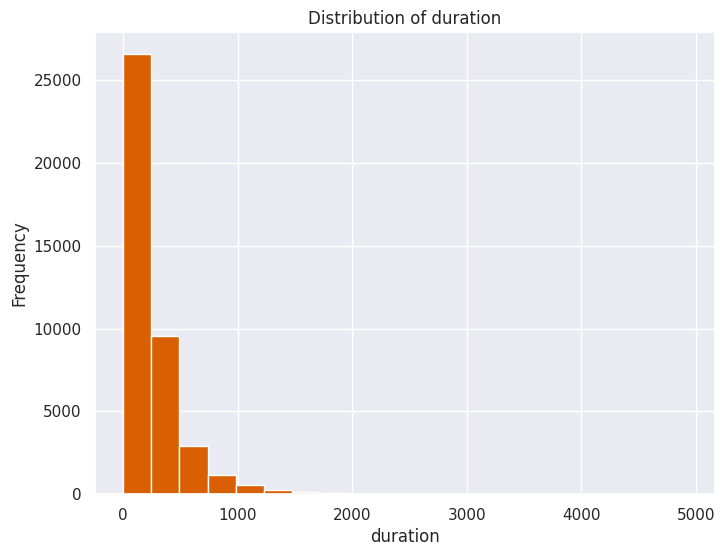

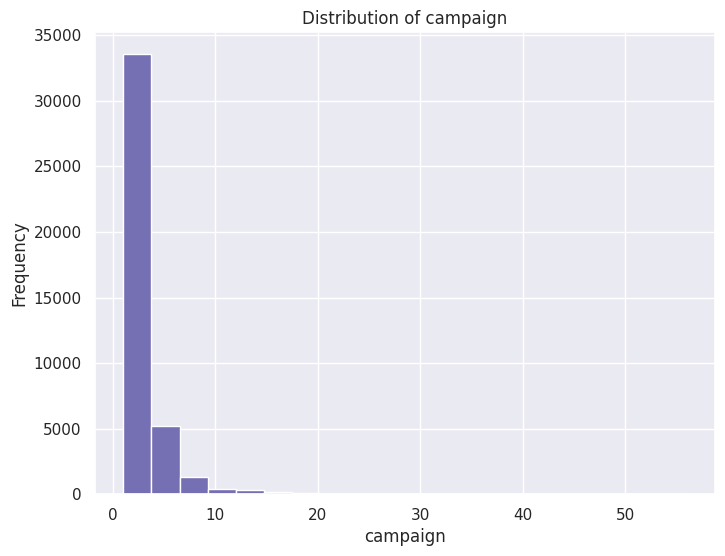

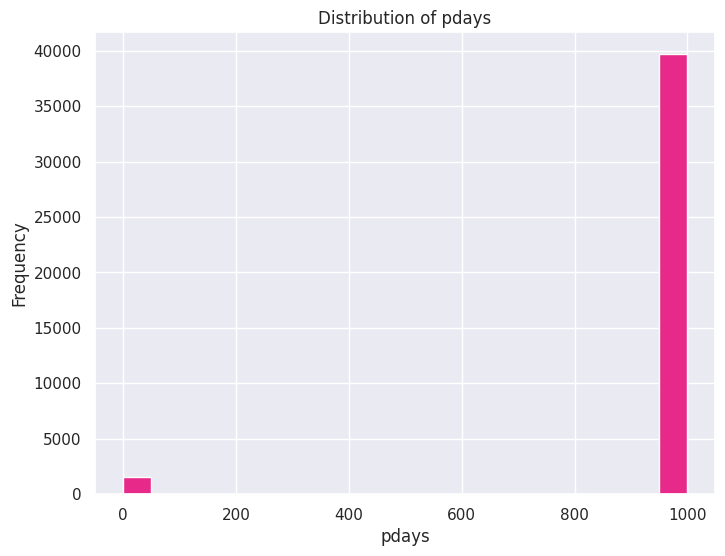

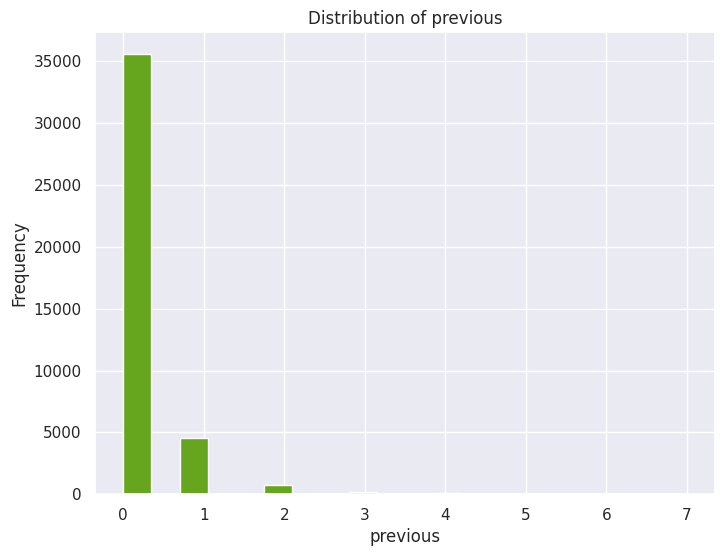

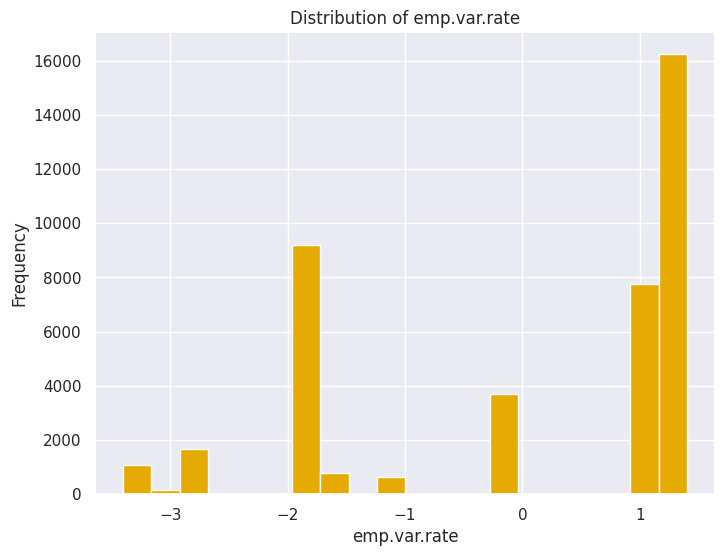

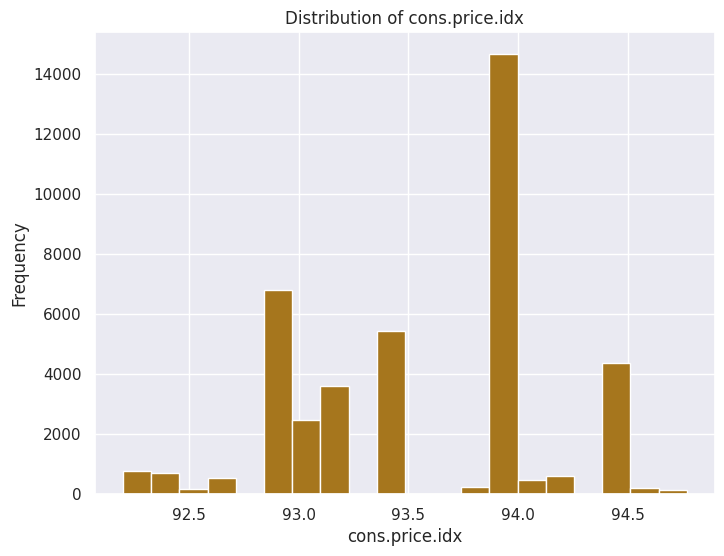

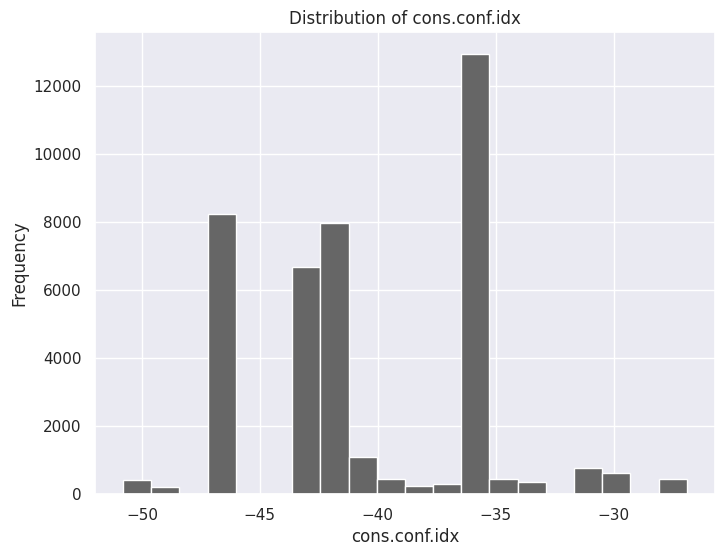

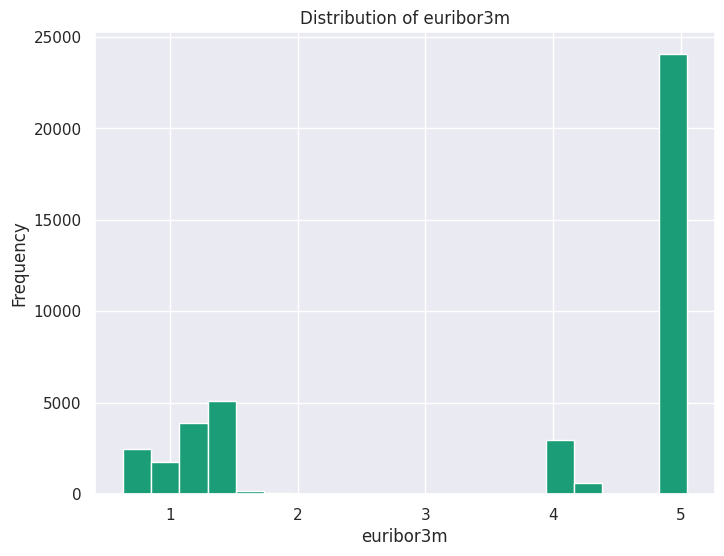

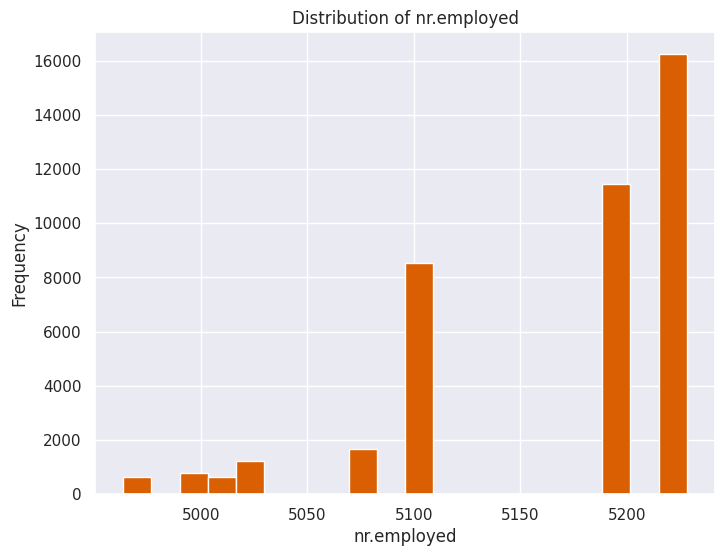

In [19]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
color_palette = sns.color_palette("Dark2", n_colors=len(numerical_columns))

for col, color in zip(numerical_columns, color_palette):
    plt.figure(figsize=(8, 6))
    plt.hist(df[col], bins=20, color=color)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

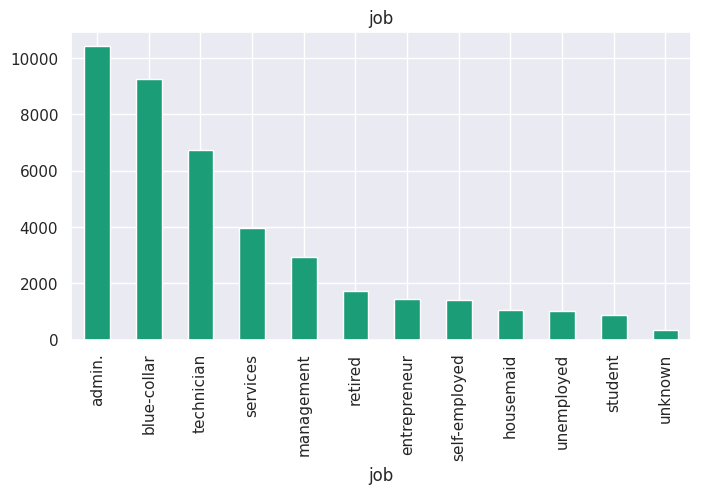

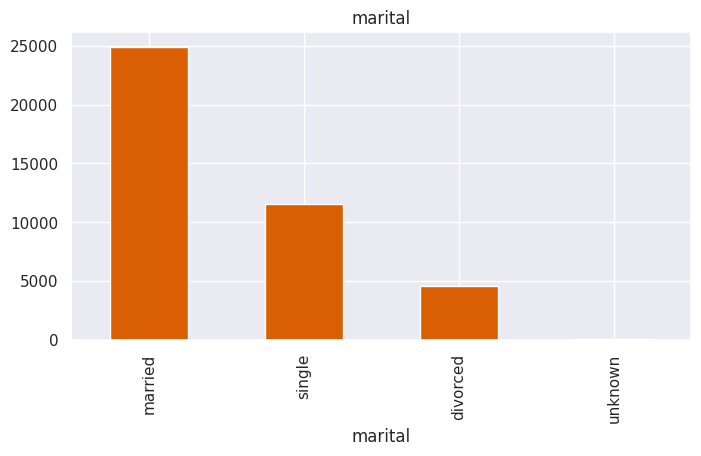

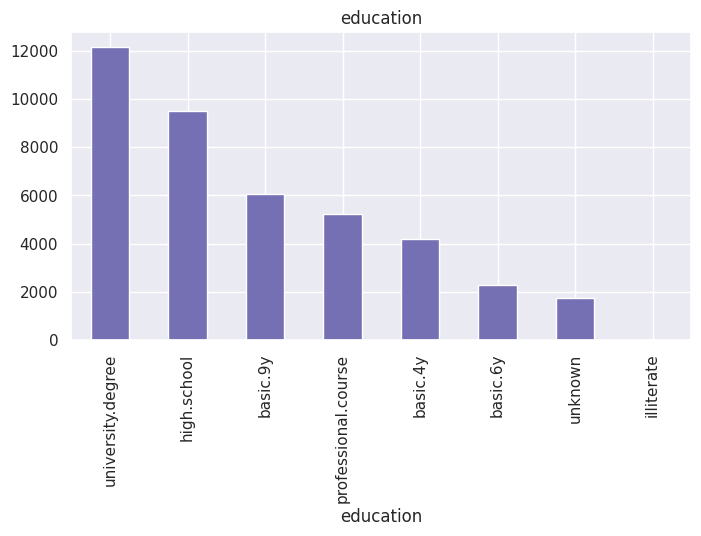

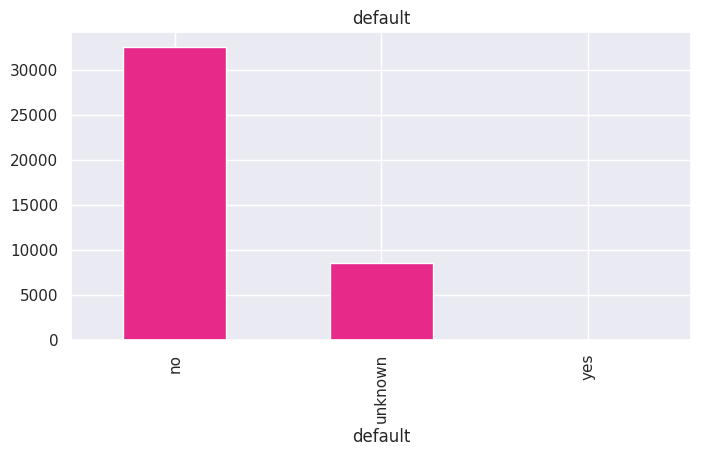

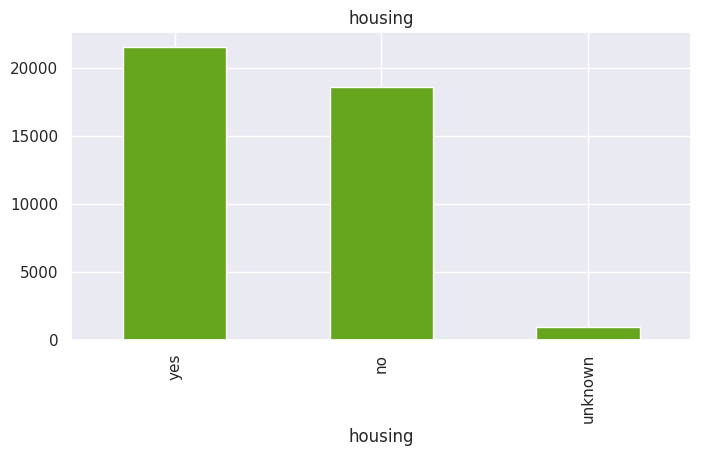

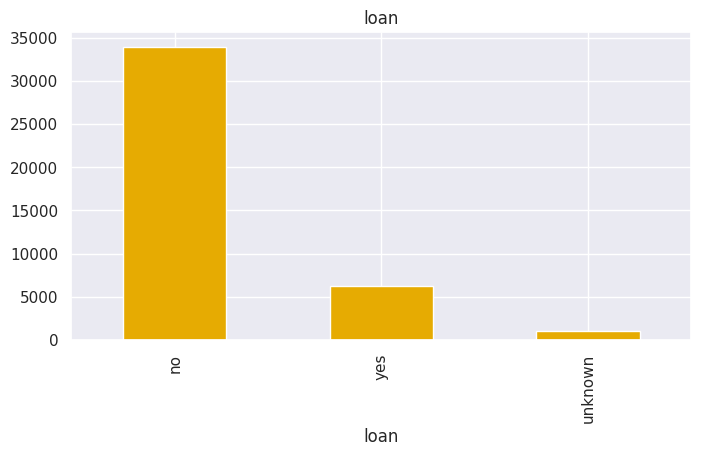

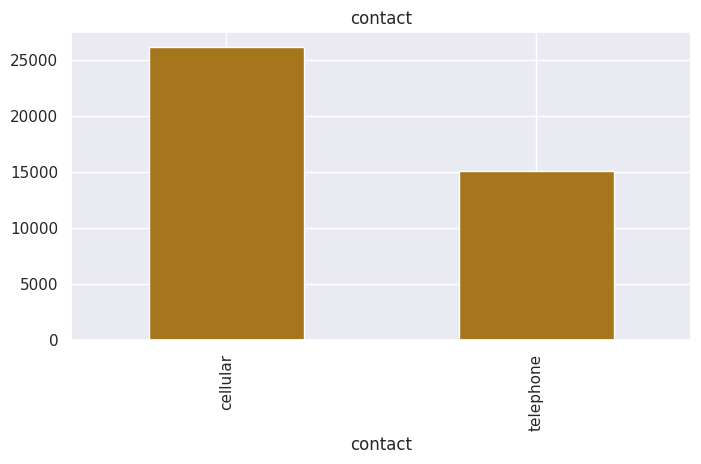

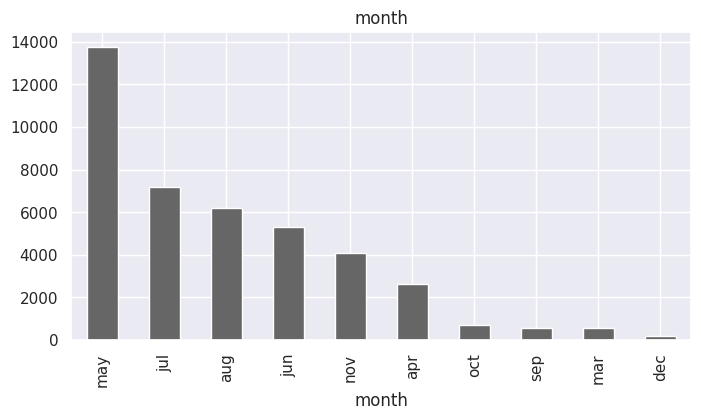

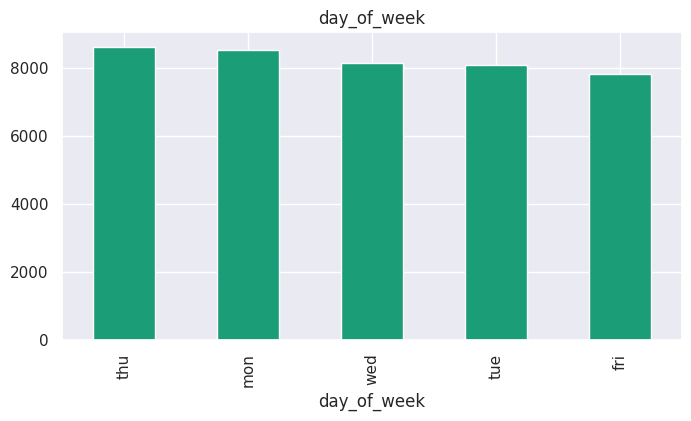

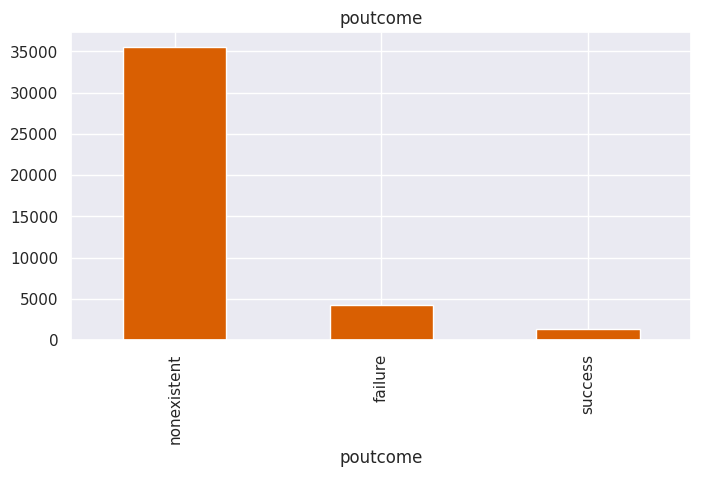

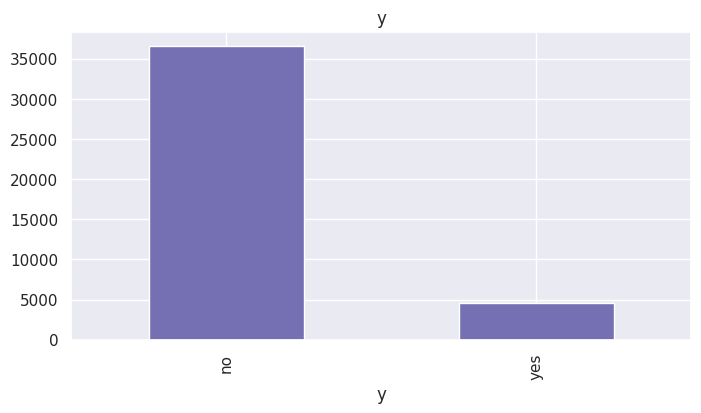

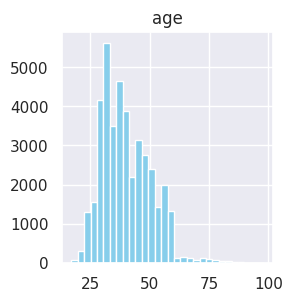

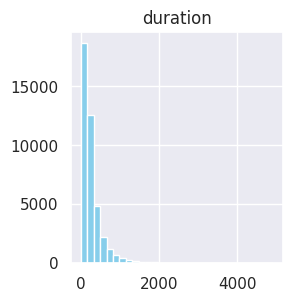

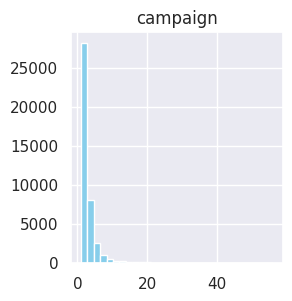

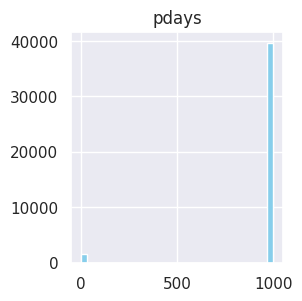

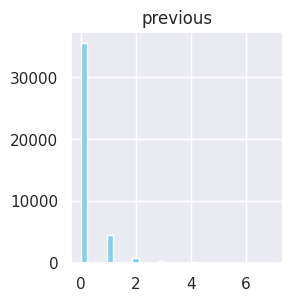

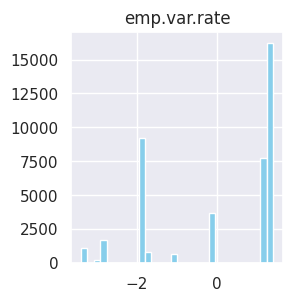

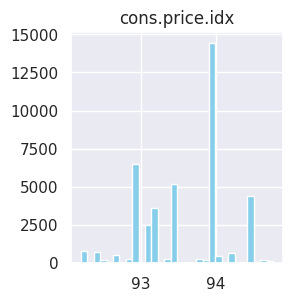

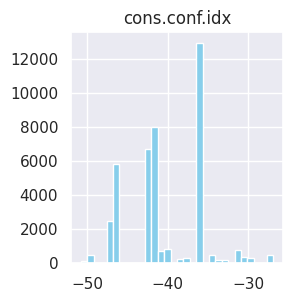

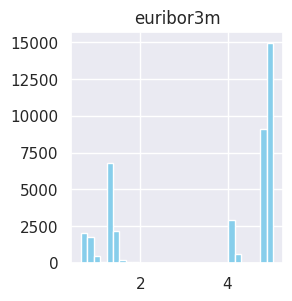

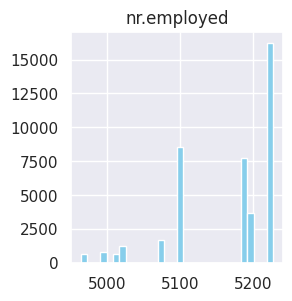

In [21]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = df.select_dtypes(include=['object', 'bool']).columns

# Define color palette
palette = sns.color_palette("Dark2", n_colors=len(categorical_columns))

# Plot histograms for categorical columns
for col, color in zip(categorical_columns, palette):
    plt.figure(figsize=(8, 4))
    df[col].value_counts().plot(kind='bar', color=color)
    plt.title(col)
    plt.show()

# Plot histograms + box plots for numerical columns
for col in numerical_columns:
    plt.figure(figsize=(6, 3))

    # Histogram
    plt.subplot(1, 2, 1)
    df[col].hist(bins=30, color='skyblue')  # You can choose any color you prefer
    plt.title(col)


    plt.show()

In [22]:
from sklearn.ensemble import RandomForestClassifier

# Assuming df is your DataFrame and 'y' is the target column

# Selecting features and target
X = df[['euribor3m', 'nr.employed', 'emp.var.rate']]
y = df['y'].map({'yes': 1, 'no': 0})  # Converting 'yes' and 'no' to binary

# Training the Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Extracting feature importances
feature_importances = rf.feature_importances_

# Mapping features to their importance
features_dict = dict(zip(X.columns, feature_importances))

# Sorting and displaying the features by importance
sorted_features = sorted(features_dict.items(), key=lambda x: x[1], reverse=True)

print(sorted_features)


[('euribor3m', 0.5394622074007565), ('nr.employed', 0.31405106535032856), ('emp.var.rate', 0.14648672724891493)]


In [26]:
non_numeric_columns = df.select_dtypes(exclude=['number']).columns.tolist()
print(non_numeric_columns)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']


In [27]:
#List of non-numeric columns excluding 'education' and target
non_numeric_columns.remove('education')
non_numeric_columns.remove('y')

# One-Hot Encoding for all non-numeric columns except 'education'
df = pd.get_dummies(df, columns=non_numeric_columns, drop_first=True)  # drop_first to avoid dummy variable trap

# Label Encoding for 'education'
le = LabelEncoder()
df['education'] = le.fit_transform(df['education'])
df.head()


,age,education,duration,campaign,pdays,previous,cons.price.idx,cons.conf.idx,euribor3m,y,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,0,261,1,999,0,93.994,-36.4,4.857,no,...,True,False,False,False,True,False,False,False,True,False
1,57,3,149,1,999,0,93.994,-36.4,4.857,no,...,True,False,False,False,True,False,False,False,True,False
2,37,3,226,1,999,0,93.994,-36.4,4.857,no,...,True,False,False,False,True,False,False,False,True,False
3,40,1,151,1,999,0,93.994,-36.4,4.857,no,...,True,False,False,False,True,False,False,False,True,False
4,56,3,307,1,999,0,93.994,-36.4,4.857,no,...,True,False,False,False,True,False,False,False,True,False


In [28]:
from sklearn.model_selection import train_test_split
X=df.drop('y',axis=1)
y=df['y']
y = (y == 'yes').astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)


from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)


from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import KFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam


# Define a function to create the neural network model
def create_model():
    model = Sequential()
    model.add(Dense(256, input_dim=X_train_resampled.shape[1], activation='relu', kernel_initializer='he_uniform'))
    model.add(Dropout(0.3))
    model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dropout(0.3))
    model.add(Dense(64, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dropout(0.3))
    model.add(Dense(32, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dropout(0.3))
    model.add(Dense(16, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dropout(0.3))
    model.add(Dense(1, activation='sigmoid'))  # Output layer

    optimizer = Adam(learning_rate=0.001)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Define k-fold cross-validation
kf = KFold(n_splits=3, shuffle=True, random_state=42)

# Initialize lists to store evaluation results
train_acc_scores = []
test_acc_scores = []

# Loop through each fold
for fold, (train_index, test_index) in enumerate(kf.split(X_train_resampled), 1):
    X_train_fold, X_val_fold = X_train_resampled[train_index], X_train_resampled[test_index]
    y_train_fold, y_val_fold = y_train_resampled[train_index], y_train_resampled[test_index]

    # Create and compile the model
    model = create_model()

    # Train the model with early stopping
    history=model.fit(
        X_train_fold, y_train_fold,
        epochs=20,  # You can adjust the maximum number of epochs
        batch_size=32,
        verbose=1,
        validation_data=(X_val_fold, y_val_fold),
        callbacks=[early_stopping]  # Add the early stopping callback
    )

    # Evaluate on training data
    train_acc = model.evaluate(X_train_fold, y_train_fold, verbose=0)[1]
    train_acc_scores.append(train_acc)

    # Evaluate on validation data
    validation_acc = model.evaluate(X_val_fold, y_val_fold, verbose=0)[1]
    test_acc_scores.append( validation_acc )

    print(f"Fold {fold} completed.")


# Calculate and print the average accuracy scores
avg_train_acc = np.mean(train_acc_scores)
avg_test_acc = np.mean(test_acc_scores)
print(f'Average Training Accuracy: {avg_train_acc}')
print(f'Average Validation Accuracy: {avg_test_acc}')

# Evaluate on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_acc}')

Epoch 1/20
1066/1066 [==============================] - 8s 5ms/step - loss: 0.4778 - accuracy: 0.7759 - val_loss: 0.3061 - val_accuracy: 0.8929
Epoch 2/20
1066/1066 [==============================] - 6s 6ms/step - loss: 0.3274 - accuracy: 0.8761 - val_loss: 0.2730 - val_accuracy: 0.8994
Epoch 3/20
1066/1066 [==============================] - 5s 5ms/step - loss: 0.3004 - accuracy: 0.8876 - val_loss: 0.2635 - val_accuracy: 0.9040
Epoch 4/20
1066/1066 [==============================] - 7s 6ms/step - loss: 0.2854 - accuracy: 0.8915 - val_loss: 0.2626 - val_accuracy: 0.9057
Epoch 5/20
1066/1066 [==============================] - 5s 5ms/step - loss: 0.2735 - accuracy: 0.8982 - val_loss: 0.2592 - val_accuracy: 0.9037
Epoch 6/20
1066/1066 [==============================] - 5s 5ms/step - loss: 0.2640 - accuracy: 0.8998 - val_loss: 0.2397 - val_accuracy: 0.9106
Epoch 7/20
1066/1066 [==============================] - 6s 6ms/step - loss: 0.2586 - accuracy: 0.9031 - val_loss: 0.2370 - val_accuracy: